# Problem Statement:
The analysis aims to find out the behavior, preference, and pattern of hotel guests in order to optimize operations, reduce cancellations, and increase revenue.
We identify the **best-performing country-**, in terms of guest bookings, and present its key drivers-stay duration, preferences, and trends. 

By fully understanding what makes the best-performing country the biggest market, we are able to offer **concrete ways** for other countries to **achieve similar performances** and attract more bookings.
gs.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1.Data preprocessing and cleaning..

In [12]:
#Load and read the dataset
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [13]:
#check datatypes
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [14]:
# Print unique values for all object (categorical) columns
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in '{col}':\n{df[col].unique()}\n")


Unique values in 'hotel':
['Resort Hotel' 'City Hotel']

Unique values in 'arrival_date_month':
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Unique values in 'meal':
['BB' 'FB' 'HB' 'SC' 'Undefined']

Unique values in 'country':
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI'

In [15]:
#look for missing values in dataset
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
#before handling missing check shape to decide on dropping or imputing missing values
df.shape

(119390, 32)

In [17]:
#checking missing value percentage for columns
missing_percentage =df[['country','agent','company','children']].isnull().mean() * 100
missing_percentage

country      0.408744
agent       13.686238
company     94.306893
children     0.003350
dtype: float64

In [18]:
#drop company, country,children columns as it has more than 94% and less than 1% missing values
#dropping agent column as it is unlikey to impact analysis
df2 = df.drop(columns = ['company','children','agent'])
df2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015


In [19]:
# Impute missing values in the 'country' column with 'Unknown'
df2['country'].fillna('Unknown', inplace=True)

In [20]:
#check missing values after handling
df2.isnull().sum().sum()

0

In [21]:
#drop duplicates
df2 = df2.drop_duplicates(keep='first')
df2.duplicated().sum()


0

In [22]:
#dropping columns that are irrelevant to dependant variable
#dropping reservation_status_date as seasonality can be captured with arrival_date_month.
#drpping days_in_waiting_list as it is not directly tied to task analysis
#dropping assigned_room_type and reserved_room_type as they are not required for task analysis
# dropping arrival_date_day_of_month and arrival_date_week_number as we have arrival_date_month that give more information

# List of irrelevant columns
irrelevant_columns = [
    'reservation_status_date', 'company', 'agent', 'days_in_waiting_list',
    'reserved_room_type', 'assigned_room_type', 'arrival_date_day_of_month', 'arrival_date_week_number'
]

# Drop the columns
df3 = df2.drop(columns=irrelevant_columns, errors='ignore')

# Verify remaining columns
print("Remaining Columns After Dropping Irrelevant Ones:")
print(df3.columns)


Remaining Columns After Dropping Irrelevant Ones:
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')


In [23]:
df3.shape

(87340, 23)

In [24]:
# Summary statistics
df3.describe()


,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,87340.000000,87340.000000,87340.000000,87340.000000,87340.000000,87340.000000,87340.000000,87340.000000,87340.000000,87340.000000,87340.000000,87340.000000,87340.000000,87340.000000
mean,0.274823,79.892123,2016.210247,1.005473,2.625567,1.875819,0.010808,0.039100,0.030433,0.184108,0.271685,106.335265,0.084268,0.698729
std,0.446427,86.054482,0.686107,1.032018,2.053799,0.626613,0.113534,0.193834,0.369263,1.732443,0.727401,55.018554,0.281599,0.832024
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,5400.000000,8.000000,5.000000


## 2. Where do the guests come from and perform special analysis.

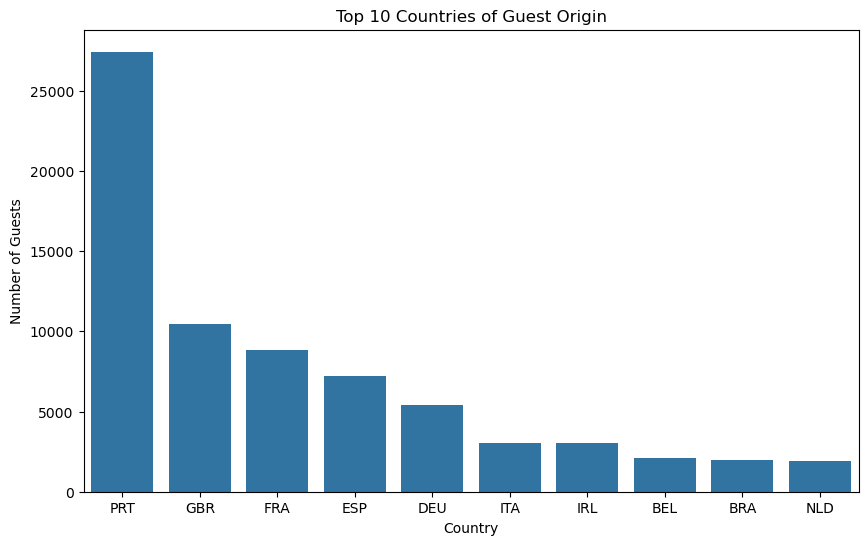

In [36]:
#Where do the guests come from?
#Analyze most guest comes from ehich country and visualize top 10
# Count of guests by country
top_countries = df3['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries of Guest Origin')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.show()

### Top 5 Guest Origins:
  1. **Portugal (PRT)** – Largest share of bookings  
  2. **United Kingdom (GBR)**  
  3. **France (FRA)**  
  4. **Spain (ESP)**  
  5. **Germany (DEU)**  

**Observation**:  
The majority of bookings are from guests with origins in **Portugal**, indicating a strong concentration of customers from this region.


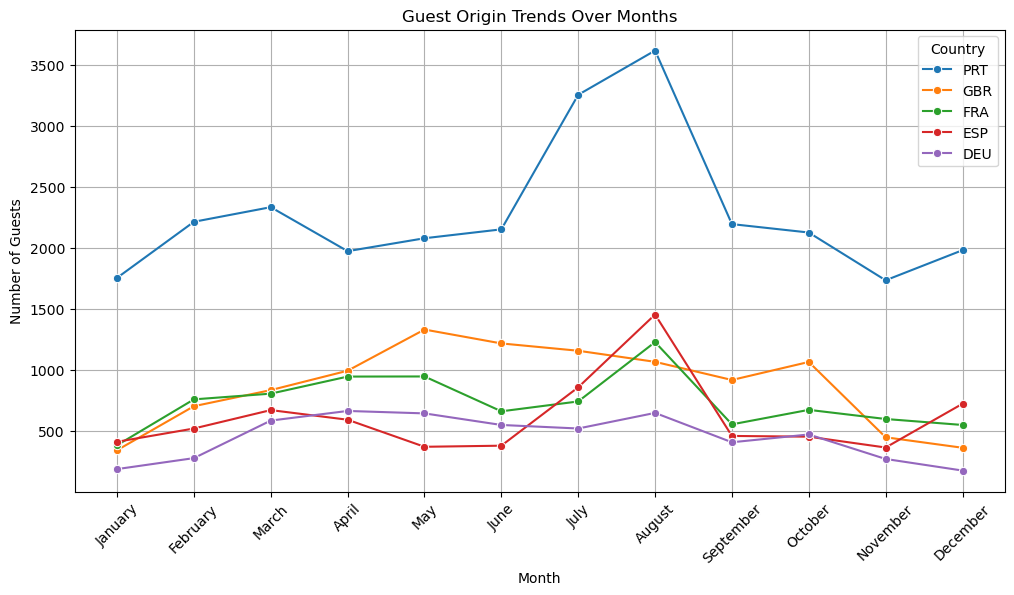

In [49]:
# Filter for top 5 countries
top_countries = ['PRT', 'GBR', 'FRA', 'ESP', 'DEU']
guest_trends = guest_trends[guest_trends['country'].isin(top_countries)]

# Set the month order explicitly
guest_trends['arrival_date_month'] = pd.Categorical(guest_trends['arrival_date_month'], 
                                                    categories=month_order, ordered=True)

# Sort by month order
guest_trends = guest_trends.sort_values('arrival_date_month')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=guest_trends, x='arrival_date_month', y='count', hue='country', marker='o')
plt.title('Guest Origin Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Guests')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid()
plt.show()


### Guest Origin Trends Over Months(Special Analysis)

**Observations**:  
1. Except for the **United Kingdom (UK)**, other countries show the **highest influx of guests in August** and the **lowest during December and Januar for all countries listedy**.  
2. This analysis helps in making **suggestions for marketing strategies** and **pricing optimizations** to better align with seasonal demand trends.


## 3.Analyze price variation during the year.

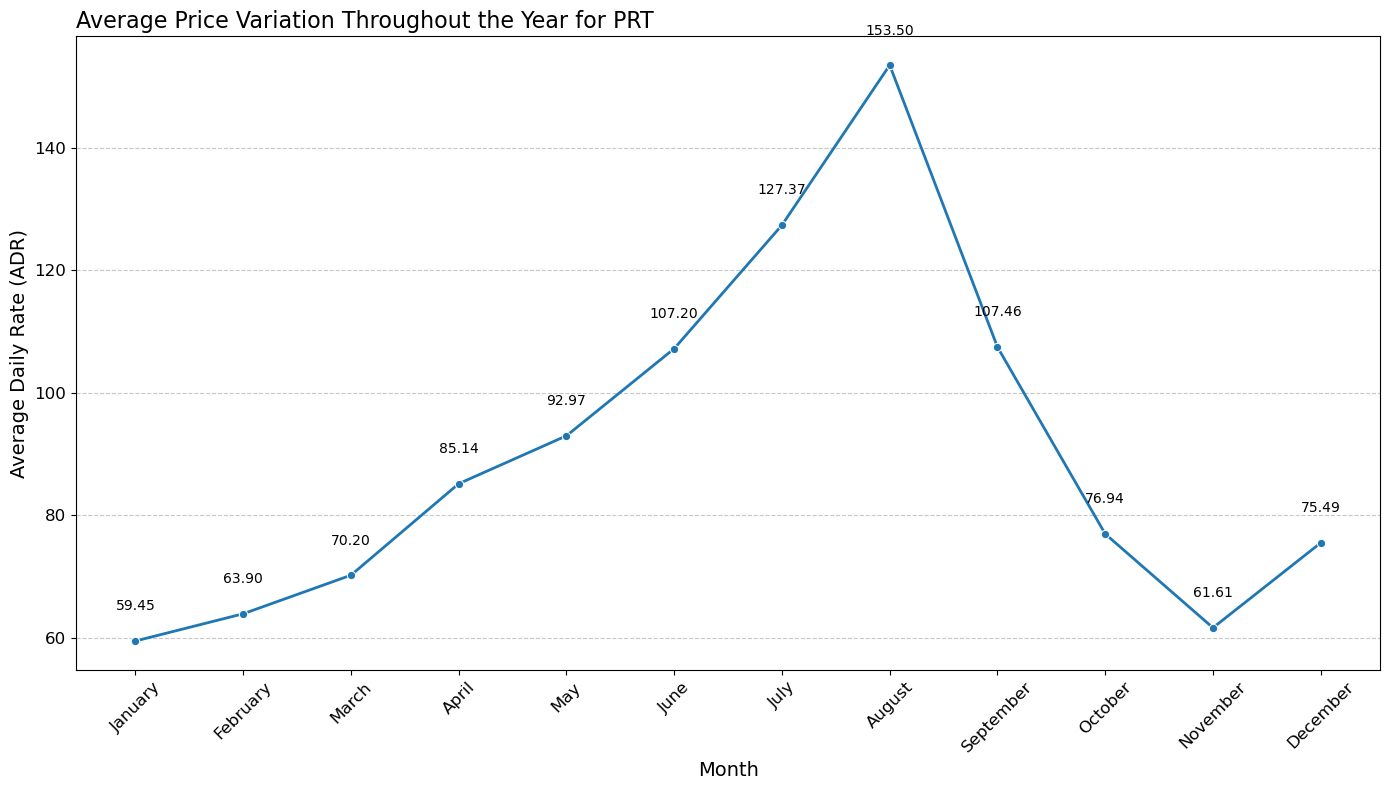

In [62]:
# Filter data for a specific country (e.g., 'PRT' for Portugal)
country_filter = 'PRT' 
df_country = df3[df3['country'] == country_filter]

# Ensure months are ordered
df_country['arrival_date_month'] = pd.Categorical(df_country['arrival_date_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)

# Group by month and calculate average price for the specific country
monthly_avg_price = df_country.groupby('arrival_date_month')['adr'].mean()

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(x=monthly_avg_price.index, y=monthly_avg_price.values, marker='o', linewidth=2)
plt.title(f'Average Price Variation Throughout the Year for {country_filter}', fontsize=16, loc='left')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Daily Rate (ADR)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate data points
for month, price in zip(monthly_avg_price.index, monthly_avg_price.values):
    plt.text(month, price + 5, f'{price:.2f}', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


### Average Price Variation Throughout the Year

**Observations**:  
1. The **highest average daily rate (ADR)** is observed in **August**, followed by **July**, aligning with the peak summer vacation season.    
2. There is a gradual increase in prices from **April to August**, indicating rising demand as the summer approaches.  
3. This analysis suggests that hotels can **maximize revenue** by adjusting prices during the peak months and introducing **discounts or promotions** in the off-season to attract guests.ts.  


## 4.Distribution of Nights spent at hotels by hotel type.

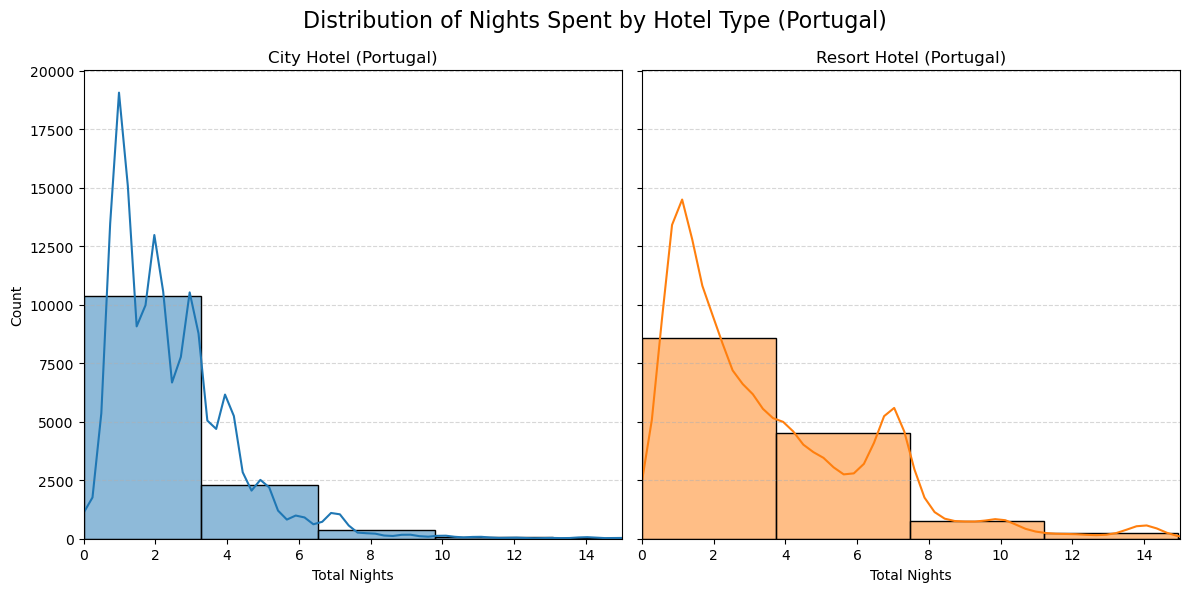

In [73]:
# Filter data for Portugal (PRT)
df_prt = df3[df3['country'] == 'PRT']

# Total nights calculation for Portugal
df_prt['total_nights'] = df_prt['stays_in_weekend_nights'] + df_prt['stays_in_week_nights']

# Create subplots for each hotel type (City Hotel and Resort Hotel)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# City Hotel Plot
sns.histplot(df_prt[df_prt['hotel'] == 'City Hotel']['total_nights'], bins=15, kde=True, ax=axes[0], color='tab:blue')
axes[0].set_title('City Hotel (Portugal)')
axes[0].set_xlabel('Total Nights')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0].set_xlim(0, 15)  # Limit x-axis to 15

# Resort Hotel Plot
sns.histplot(df_prt[df_prt['hotel'] == 'Resort Hotel']['total_nights'], bins=15, kde=True, ax=axes[1], color='tab:orange')
axes[1].set_title('Resort Hotel (Portugal)')
axes[1].set_xlabel('Total Nights')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
axes[1].set_xlim(0, 15)  # Limit x-axis to 15

# Common layout settings
fig.suptitle('Distribution of Nights Spent by Hotel Type (Portugal)', fontsize=16)
plt.tight_layout()
plt.show()

### Observations: Distribution of Nights Spent by Hotel Type

**City Hotel**:
- **Peak Stay**: 1-3 nights, with a sharp drop-off beyond 3 nights.
- **Short Stays**: Dominated by short-term guests, likely business or city tourists.
- **Long Stays**: Rarely exceed 7 nights.

**Resort Hotel**:
- **Broader Spread**: Both short (1-3 nights) and longer stays (4-7 nights) are common.
- **Peak Stay**: 1 night, but decline is more gradual compared to city hotels.
- **Extended Stays**: Notable for stays exceeding 7 nights, catering to vacationers.

**Comparison**:
- City hotels attract shorter stays; resort hotels accommodate both short and extended stays.
vacationing guests.
cationing guests.  


## 5.Analyzing the preference of guests, what do they basically prefer??

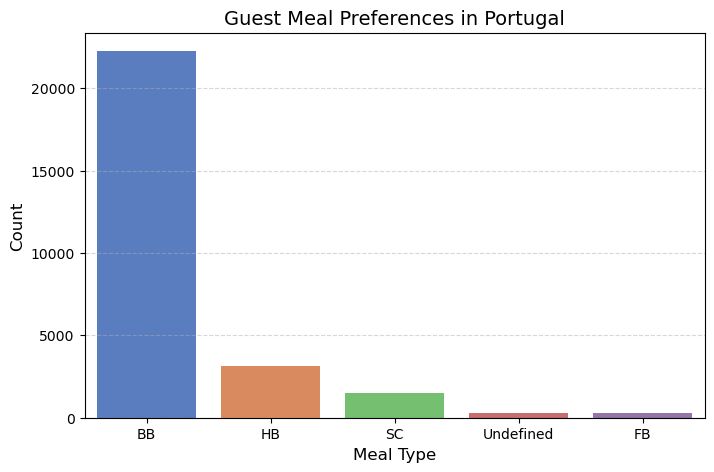

In [83]:
# Filter data for Portugal (PRT)
df_prt = df3[df3['country'] == 'PRT']

# Meal preference for Portugal
meal_pref_prt = df_prt['meal'].value_counts()

# Plot meal preferences for Portugal
plt.figure(figsize=(8, 5))
sns.barplot(x=meal_pref_prt.index, y=meal_pref_prt.values, palette='muted')
plt.title('Guest Meal Preferences in Portugal', fontsize=14)
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Guest Meal Preferences in Portugal

**Observations:**
1. The **BB (Bed & Breakfast)** option is preferred by most of the Portuguese guests, as shown by the highest bar.
2. Introduce interesting BB packages, as Portuguese guests prefer flexible meal arrangements. This will increase bookings and pleasing guests.
.hotels.


## 6.Analyzing special requests made by customers..

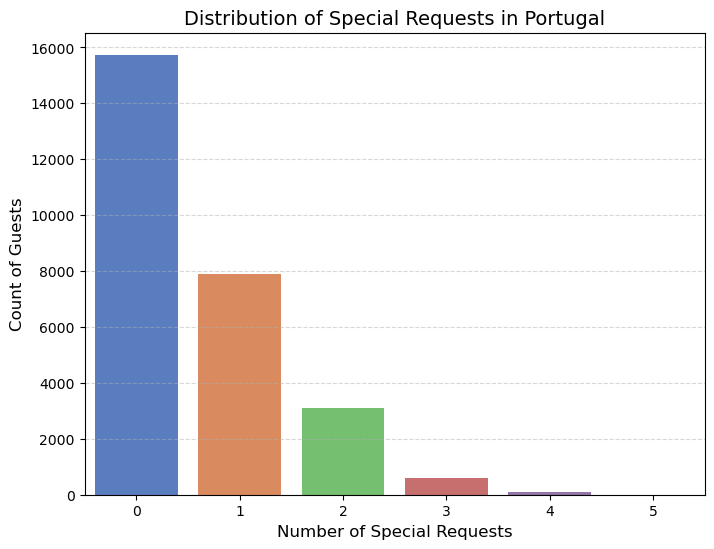

In [89]:
# Filter data for Portugal (PRT)
df_prt = df3[df3['country'] == 'PRT']

# Number of special requests for Portugal
special_requests_prt = df_prt['total_of_special_requests'].value_counts()

# Plot distribution of special requests for Portugal
plt.figure(figsize=(8, 6))
sns.barplot(x=special_requests_prt.index, y=special_requests_prt.values, palette='muted')
plt.title('Distribution of Special Requests in Portugal', fontsize=14)
plt.xlabel('Number of Special Requests', fontsize=12)
plt.ylabel('Count of Guests', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Distribution of Special Requests in Portugal

**Observations**sights:
- Dominance of **0 and 1 special request** suggests that for most Portuguese guests, very limited customization is required during theigagement.


## 7.Analyzing the relationship between special requests and cancellations.

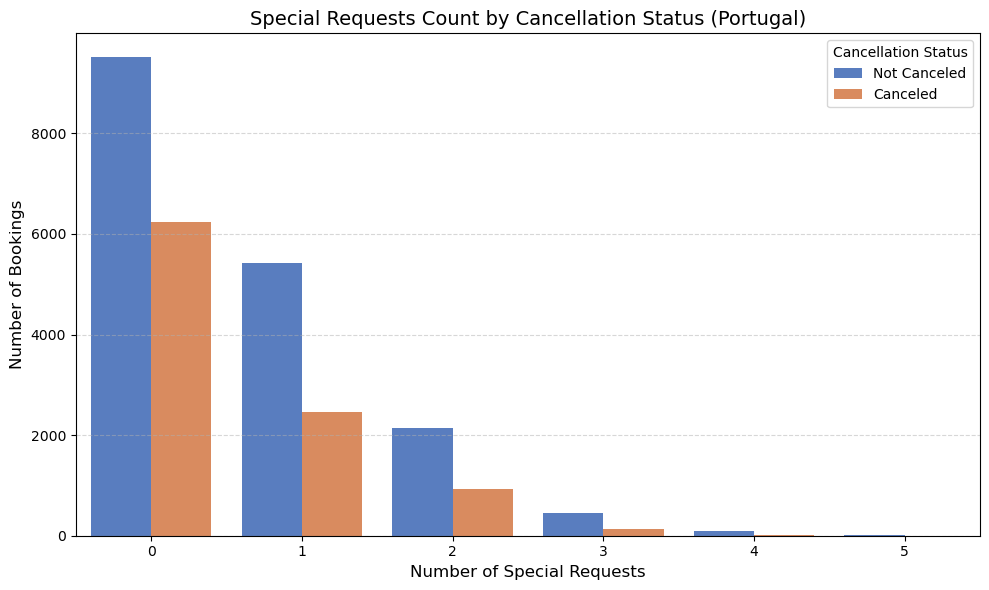

In [93]:
# Filter data for Portugal (PRT)
df_prt = df3[df3['country'] == 'PRT']

# Plot special requests by cancellation status for Portugal
plt.figure(figsize=(10, 6))
sns.countplot(data=df_prt, x='total_of_special_requests', hue='is_canceled', palette='muted')
plt.title('Special Requests Count by Cancellation Status (Portugal)', fontsize=14)
plt.xlabel('Number of Special Requests', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Special Requests vs Cancellation Status (Portugal)

**Observations**: 
1. The bookings with **0 special requests** are being canceled the most, as depicted by the higher number of canceled bookinment.  

**Insights**:  
- Guests with **no special requests** may be less committed to their bookings, leading to higher cancellation rates.  
- Special requests seem to reflect a higher degree of guest intent and planning.
HOTELS CAN USE THIS ANALYSIS TO **IDENTIFY HIGH-RISK BOOKINGS** (0 special requests) and use various strategies to reduce cancellations, such as offering incentives or confirmations.


## 8.Which are the busiest months or in which guests are high??

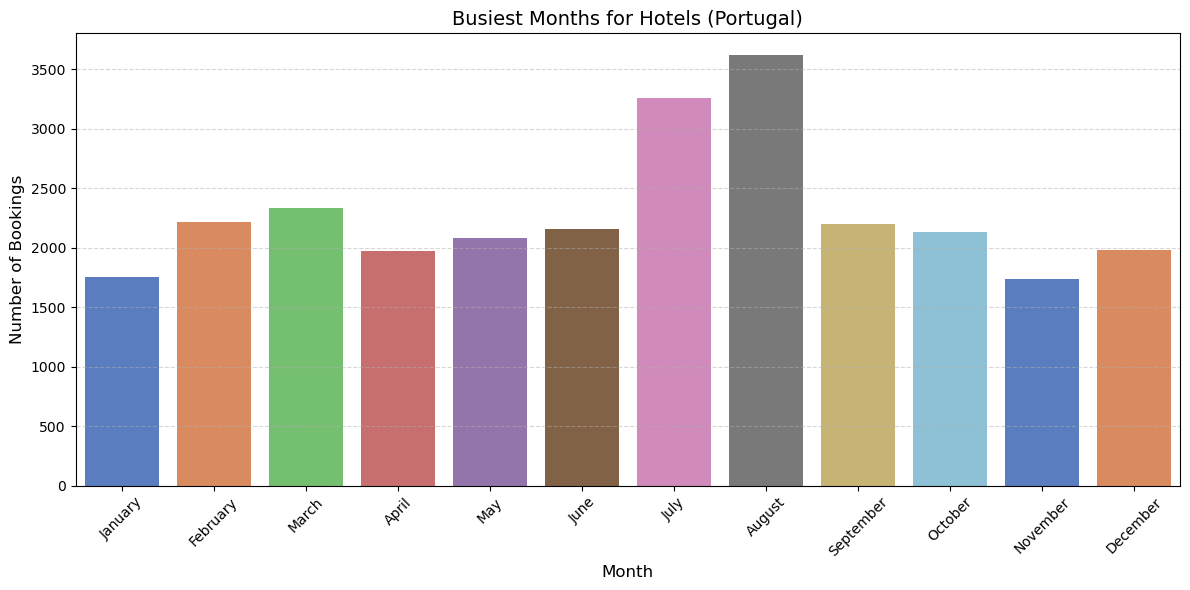

In [98]:
# Filter data for Portugal (PRT)
df_prt = df3[df3['country'] == 'PRT']

# Count bookings per month for Portugal
monthly_bookings_prt = df_prt['arrival_date_month'].value_counts()

# Plot busiest months for Portugal
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_bookings_prt.index, y=monthly_bookings_prt.values, palette='muted')
plt.title('Busiest Months for Hotels (Portugal)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Busiest Months for Hotels (Portugal)

**Observations**: 
1. **August** and **July** are the **busiest months** for Portuguese guests, not coincidentally in the summer holiday period. 

**Insights**
- During summer, **peak demand** is seen in hotels, specifically in the months of **July and August**.  
- Marketing efforts and price strategies can be done to take maximum advantage of the peak months of summer.bruary.


## 9.How long do people stay at the hotels.

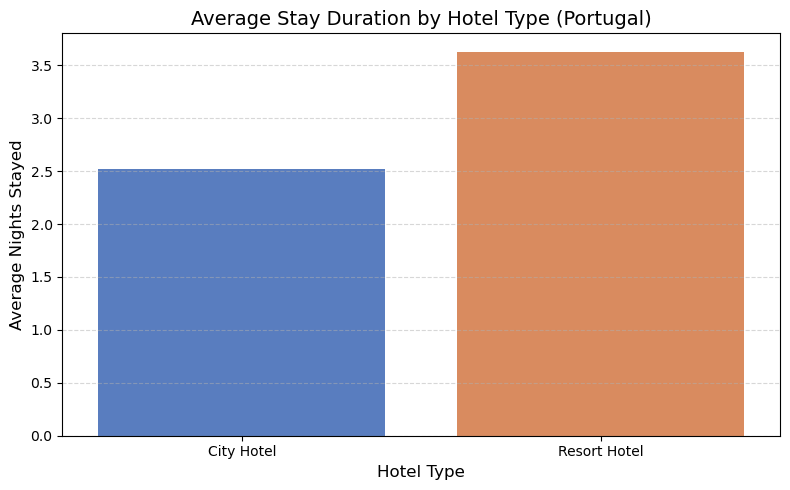

In [102]:
# Filter data for Portugal (PRT)
df_prt = df3[df3['country'] == 'PRT']

# Calculate total nights spent
df_prt['total_nights'] = df_prt['stays_in_weekend_nights'] + df_prt['stays_in_week_nights']

# Calculate average stay duration by hotel type for Portugal
avg_stay_prt = df_prt.groupby('hotel')['total_nights'].mean()

# Plot average stay duration
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_stay_prt.index, y=avg_stay_prt.values, palette='muted')
plt.title('Average Stay Duration by Hotel Type (Portugal)', fontsize=14)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Average Nights Stayed', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Average Stay Duration by Hotel Type (Portugal)

**Observations**: 
1. Guests from Portugal staying in **Resort Hotels** have a much longer average stay duration compared to those staying in **City Hotels**.   

**Insights**:  
- **City Hotels** host customers for a shorter period of time, probably for business or quick visits.  
- **Resort Hotels** attract customers seeking longer and more leisurely stays.  
- The hotels can therefore use this to design their services:
- Promote extended stay packages for Resort Hotels and offer flexible short-stay services for City Hotels.
ity Hotels.


## 10.Analyze more about customers.

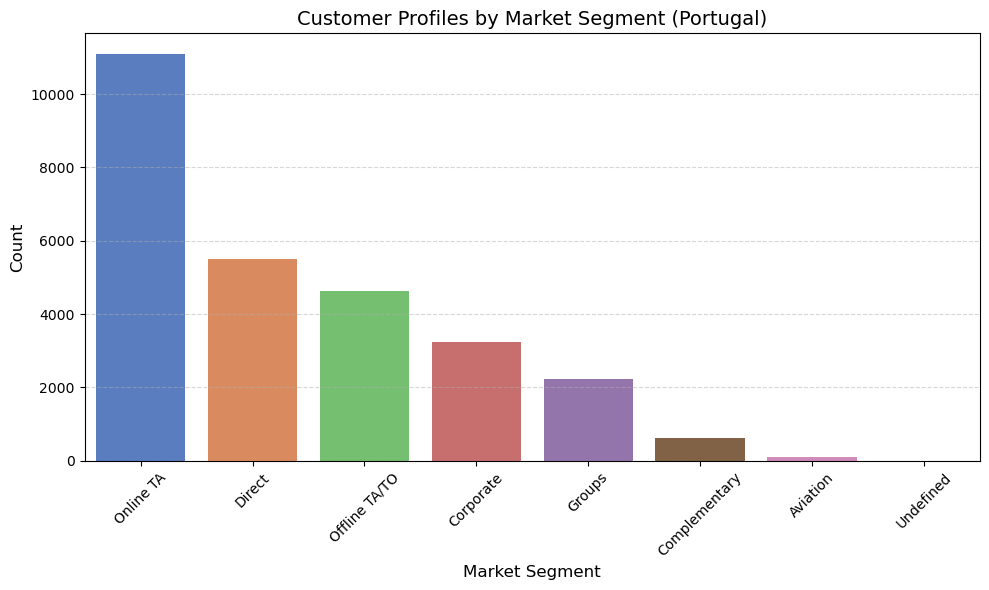

In [106]:
# Filter data for Portugal (PRT)
df_prt = df3[df3['country'] == 'PRT']

# Analyze customers by market segment for Portugal
customer_segment_prt = df_prt['market_segment'].value_counts()

# Plot customer profiles by market segment
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_segment_prt.index, y=customer_segment_prt.values, palette='muted')
plt.title('Customer Profiles by Market Segment (Portugal)', fontsize=14)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Customer Profiles by Market Segment (Portugal)

**Observations**:
3. The strong presence of **Online TA** indicates the preference of Portuguese guests to rely on online channels out of convenience and for the purpose of price comparisons.

**Insights** :
- More close partnerships with **Online Travel Agencies (OTA)** may strengthen the volume of Portuguese guests.
- The share of direct bookings signals strong customer trust and loyalty. Hotels may give more incentive to customers for direct booking through loyalty programs or discounts.
- Corporate and Group bookings are relatively at a low level, showing an opportunity in attracting this kind of segment through targeted marketing.


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)


#  Filter data for Portugal
df_prt = df3[df3['country'] == 'PRT']



In [171]:
# Select relevant features and target
features = ['total_nights', 'total_of_special_requests', 'meal', 'adr', 'market_segment', 'arrival_date_month']
X = df_prt[features]
y = df_prt['is_canceled']

# Handle categorical variables using One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['meal', 'market_segment', 'arrival_date_month'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


In [173]:
# Train Logistic Regression and Random Forest
log_model = LogisticRegression(max_iter=1000)  # Add max_iter for convergence
log_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Models
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [175]:
# Print metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))
print()

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


Logistic Regression:
Accuracy: 0.7155182889780046
ROC-AUC: 0.7484188846277833

Random Forest:
Accuracy: 0.7076193948231863
ROC-AUC: 0.7465250069957435


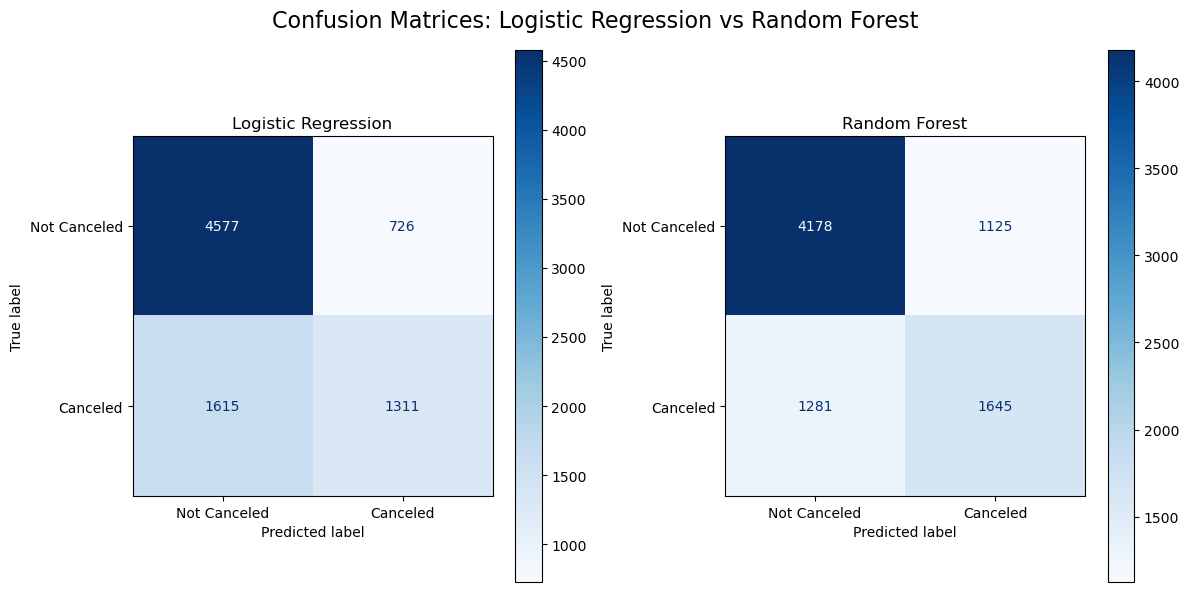

In [177]:
#  Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Confusion Matrices: Logistic Regression vs Random Forest", fontsize=16)

# Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Not Canceled', 'Canceled'])
disp_log.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title("Logistic Regression")

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Not Canceled', 'Canceled'])
disp_rf.plot(ax=axes[1], cmap='Blues', values_format='d')
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()

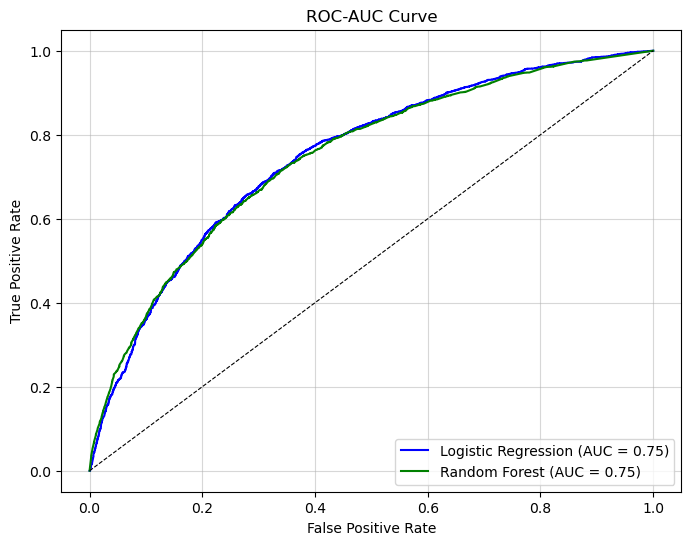

In [179]:
# ROC-AUC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', linewidth=0.8)  # Diagonal Line

plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.show()

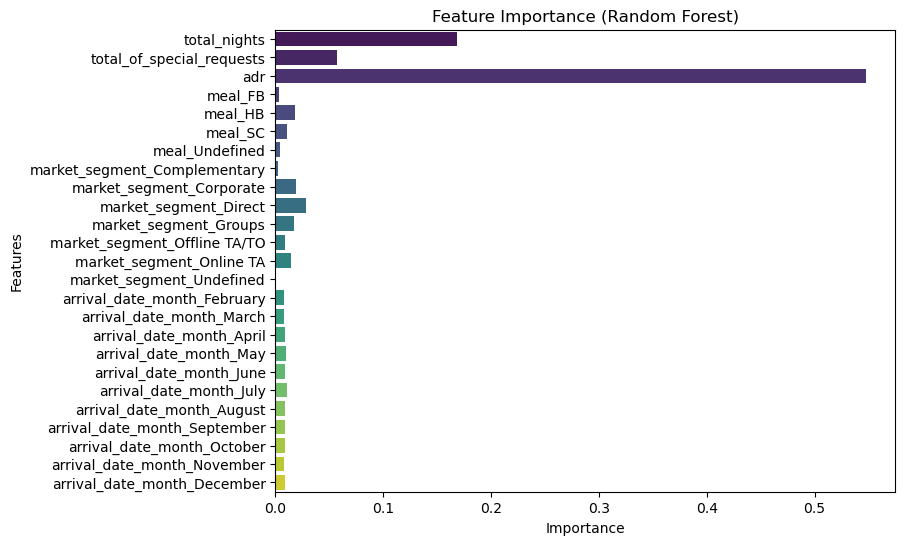

In [181]:
# Feature Importance for Random Forest
importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()